In [18]:
using LinearAlgebra
using Distributions
using ProgressMeter
using Plots

In [2]:
alpha = 0.05
tau = 0.1
gamma = 0.1

agentParams = (alpha, tau, gamma)

(0.05, 0.1, 0.1)

In [3]:
function generateMatchingPennies()
    """
    Create Matching Pennies Matrix
    """
    
    A, B = [1 -1; -1 1], [-1 1; 1 -1]
    
    return A, B
end

generateMatchingPennies (generic function with 1 method)

In [4]:
function getActionProbs(qValues, agentParams)
    """
    qValues: nPlayer x nActions x nSim
    return: nPlayer x nActions x nSim
    """
    alpha, tau, gamma = agentParams
    
    return exp.(tau * qValues)./sum(exp.(tau * qValues), dims=2)
end

getActionProbs (generic function with 1 method)

In [5]:
function chooseActions(actionProbs)
    return [rand(Bernoulli(actionProbs[p, 1])) + 1 for p = 1:3]
end

chooseActions (generic function with 1 method)

In [6]:
function initialiseQ()
    return rand(3, 2)
end

initialiseQ (generic function with 1 method)

In [7]:
function getRewards(G, bChoice)
    A, B = G
    
    rewards = zeros(3)
    rewards[1] = A[bChoice[1], bChoice[2]] + B[bChoice[1], bChoice[3]]
    rewards[2] = B[bChoice[1], bChoice[2]] + A[bChoice[2], bChoice[3]]
    rewards[3] = A[bChoice[3], bChoice[1]] + B[bChoice[2], bChoice[3]]
    
    return rewards
end

getRewards (generic function with 1 method)

In [8]:
function qUpdate!(Q, G, agentParams)
    
    actionProbs = getActionProbs(Q, agentParams)
    bChoice = chooseActions(actionProbs)
    rewards = getRewards(G, bChoice)

    for i = 1:3
        Q[i, bChoice[i]] += alpha * (rewards[i] - Q[i, bChoice[i]] + gamma * findmax(Q[i, :])[1])
    end
    
end

qUpdate! (generic function with 1 method)

In [9]:
function simulate(nIter = 5e3)
    nIter = trunc(Int, nIter)
    
    G = generateMatchingPennies()
    Q = initialiseQ()
    
    global firstActionTracker = zeros(3, nIter)
    
    for cIter = 1:trunc(Int, nIter)
        qUpdate!(Q, G, agentParams)
        firstActionTracker[:, cIter] = getActionProbs(Q, agentParams)[:, 1]
    end
    
    return firstActionTracker
end

simulate (generic function with 2 methods)

In [10]:
firstActionTracker = simulate()

3×5000 Array{Float64,2}:
 0.489446  0.48989   0.490314  0.487894  …  0.508234  0.508074  0.507823
 0.513221  0.515121  0.516935  0.516854     0.482314  0.480756  0.483205
 0.485222  0.482365  0.479652  0.482068     0.504576  0.506452  0.504348

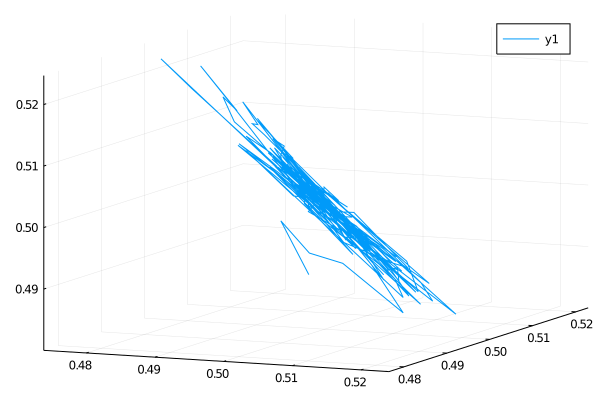

In [19]:
samples = 25

plt3d = plot(firstActionTracker[1, 1:samples:end], firstActionTracker[2, 1:samples:end], firstActionTracker[3, 1:samples:end])

display(plt3d)

In [12]:
firstActionTracker[1, 1:10:end]

500-element Array{Float64,1}:
 0.4894455418065452
 0.48768306250115434
 0.48636971483664737
 0.48489896227646523
 0.49021505649823355
 0.48529597579010925
 0.48165702689344986
 0.4902443062027678
 0.4904533919199636
 0.49474534894416
 0.5063414802320426
 0.5046943017291783
 0.5067711620399954
 ⋮
 0.5140641161133278
 0.5155905897067531
 0.5146418913130263
 0.511639395498947
 0.5051911503893257
 0.506973525524272
 0.5086351067199468
 0.5091042232144061
 0.5091886571259471
 0.5055936855341412
 0.510921880853862
 0.5100697973894988